In [1]:
import numpy as np
from numpy import cos, sin, pi, random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter # to remove the ticks
import pandas as pd
# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
mycmap = ListedColormap(["blue","red","gold" ])
from time import time
from sklearn import manifold
from scipy.stats import special_ortho_group
!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


In [2]:
Ls=np.arange(3,11)
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

## ------------------------------------
## Exercise 1: Increasing dimensions
## ------------------------------------

N= 1000   D= 3
distance i=13 and j=1 1552.6302096770091
mean minimum distance between points:  18.55757910124019
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
N= 1000   D= 4
distance i=13 and j=1 1114.1328506359382
mean minimum distance between points:  21.976552337226458
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
N= 1000   D= 5
distance i=13 and j=1 482.87112389459764
mean minimum distance between points:  25.357325832358896
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
N= 1000   D= 6
distance i=13 and j=1 1108.7108559193036
mean minimum distance be

<function matplotlib.pyplot.show(close=None, block=None)>

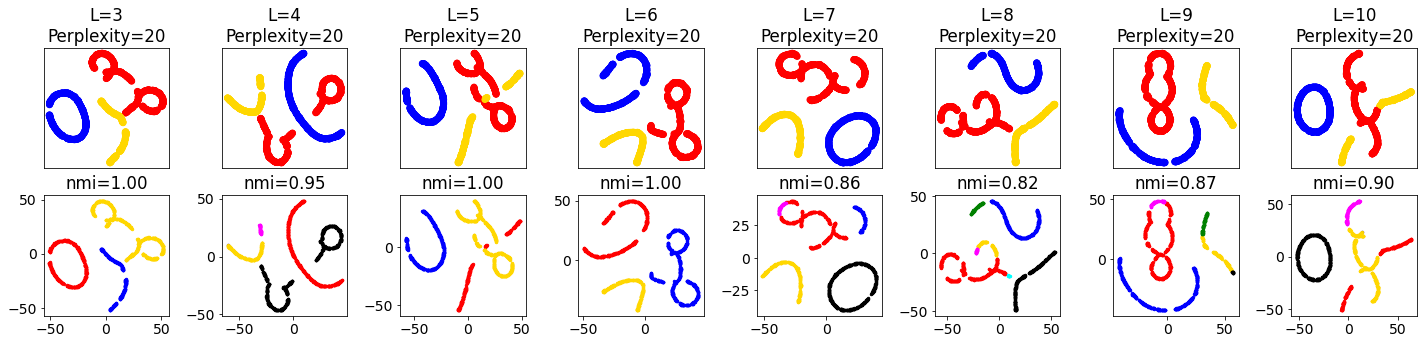

In [3]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

mean_distances=[]
Ls=np.arange(3,11)
Np=len(Ls)

(fig, subplots_p) = plt.subplots(2,8 , figsize=(20, 5))
for l,i in enumerate(Ls):
    D=i
    fname,fnamey="x_"+str(i)+"d.dat","y_"+str(i)+"d.dat"
    data=np.loadtxt("DATA/"+fname, delimiter='\t')
    y=np.loadtxt("DATA/"+fnamey,dtype=int)
    N=len(data)
    D=len(data[0])
    print("N=",N,"  D=",D)
    x=data

    print('distance i=13 and j=1',dist(x,13,1))
    mdist = np.zeros(N)
    for i in range(N):
        dm = 1e100
        for j in range(N):
            if i!=j:
                dij = dist(x,i,j);
                if dij<dm:
                    dm = dij
        mdist[i] = dm
    mean_min_dist = mdist.mean()
    print("mean minimum distance between points: ",mean_min_dist)
    mean_distances.append(mean_min_dist)
#*********************
    np.random.seed(0)
    n_samples = N
    n_components = 2 
    
    Np = len(Ls)
    mycmap = ListedColormap(["blue","red","gold" ])

    
    X_all = [None]
    ax=subplots_p[0][l]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                        random_state=0, perplexity=20)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("L="+str(D)+"\nPerplexity=20")
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    #X_all.append(Y)
    #plt.show()
#********************
# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
    np.random.seed(12345)
    n_true_center=3
    #X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
    X2D = Y # best visualization above
    X = data
    y_true = y

    #eps_range = [0.01,0.1,0.5,1.0,10.]
    if mean_min_dist<10:
        r=mean_min_dist
    else:
        r = int(mean_min_dist)
    eps_range = [r,3*r,6*r,9*r,12*r]
    min_sample_range = [3,5,10,20]
    ax1=subplots_p[1][l]

    model = DBSCAN(eps=108, min_samples=5)
    model.fit(X)
    y_hat = model.labels_
    plotting_ax(X2D,y_hat,ax1)
    nmi=NMI(y_hat, y_true)
    ax1.set_title('nmi=%.2f'%(nmi))
    plt.tight_layout(h_pad=0.5)
    #plt.show()
plt.show

### Rotating the data first

N= 1000   D= 3
mean minimum distance between points:  18.55757910124019
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
N= 1000   D= 4
mean minimum distance between points:  21.976552337226458
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
N= 1000   D= 5
mean minimum distance between points:  25.357325832358896
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
N= 1000   D= 6
mean minimum distance between points:  28.147104971457736
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in 

<function matplotlib.pyplot.show(close=None, block=None)>

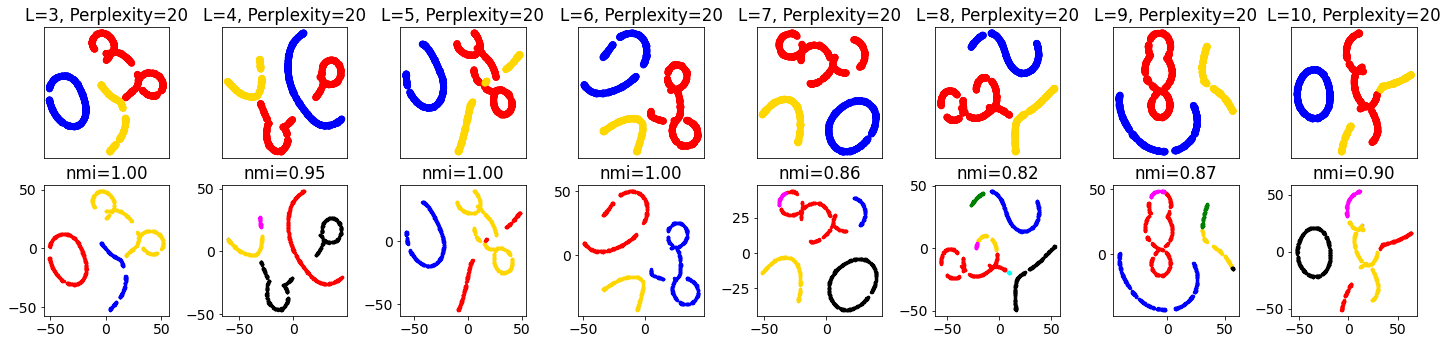

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(20, 5))

#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])
mean_distances=[]
for j,i in enumerate(Ls):

    fname,fnamey="x_"+str(i)+"d.dat","y_"+str(i)+"d.dat"
    data=np.loadtxt("DATA/"+fname, delimiter='\t')
    y=np.loadtxt("DATA/"+fnamey,dtype=int)
    N=len(data)
    D=len(data[0])
    print("N=",N,"  D=",D)
    x=data@special_ortho_group.rvs(D)
    mdist = np.zeros(N)
    for k in range(N):
        dm = 1e100
        for l in range(N):
            if k!=l:
                dkl = dist(x,k,l);
                if dkl<dm:
                    dm = dkl
        mdist[k] = dm
    mean_min_dist = mdist.mean()
    print("mean minimum distance between points: ",mean_min_dist)
    mean_distances.append(mean_min_dist)
#*********************
    np.random.seed(0)
    n_samples = N
    n_components = 2 
    
    Np = len(Ls)
    mycmap = ListedColormap(["blue","red","gold" ])

    X_all = [None]
    

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                        random_state=0, perplexity=20)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax[0, j].set_title("L="+ str(D)+", Perplexity=20")
    ax[0, j].scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax[0, j].tick_params(left=False,bottom=False)
    ax[0, j].xaxis.set_major_formatter(NullFormatter())
    ax[0, j].yaxis.set_major_formatter(NullFormatter())
    ax[0, j].axis('tight')
    #X_all.append(Y)
#********************
# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
    np.random.seed(12345)
    n_true_center=3
    #X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
    X2D = Y # best visualization above
    X = data
    y_true = y

    #eps_range = [0.01,0.1,0.5,1.0,10.]
    if mean_min_dist<10:
        r=mean_min_dist
    else:
        r = int(mean_min_dist)
    eps_range = [r,3*r,6*r,9*r,12*r]
    min_sample_range = [3,5,10,20]
    model = DBSCAN(eps=108, min_samples=5)
    model.fit(X)
    y_hat = model.labels_
    plotting_ax(X2D,y_hat,ax[1, j])
    nmi=NMI(y_hat, y_true)
    ax[1, j].set_title('nmi=%.2f'%(nmi))
    plt.tight_layout(h_pad=0.5)
plt.show

## ------------------------------------
## Exercise 2: role of the perplexity
## ------------------------------------

Perplexity is a parameter which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures.

The perplexity is defined as

$$Perp(P_i) = 2^H(P_i)$$

where $H(P_i)$ is the Shannon entropy of $P_i$ measured in bits

$$H(P_i) = -\sum_j p_{j|i} \log_2 p_{j|i}$$.

The larger the perplexity, the more non-local information will be retained in the dimensionality reduction result.

We can see this behaviour in the plots above: a small value in the perplexity corresponds to a smaller number of neighbours which have significant $p_{j|i}$, while a greater value of perplexity corresponds to a (too) larger number of neighbours considered significant.

Below, we report a significant example form scikit learn page.

circles, perplexity=5 in 0.31 sec
circles, perplexity=30 in 0.7 sec
circles, perplexity=50 in 0.76 sec
circles, perplexity=100 in 0.71 sec
S-curve, perplexity=5 in 0.41 sec
S-curve, perplexity=30 in 0.52 sec
S-curve, perplexity=50 in 0.62 sec
S-curve, perplexity=100 in 0.76 sec
uniform grid, perplexity=5 in 0.53 sec
uniform grid, perplexity=30 in 0.73 sec
uniform grid, perplexity=50 in 0.78 sec
uniform grid, perplexity=100 in 0.82 sec


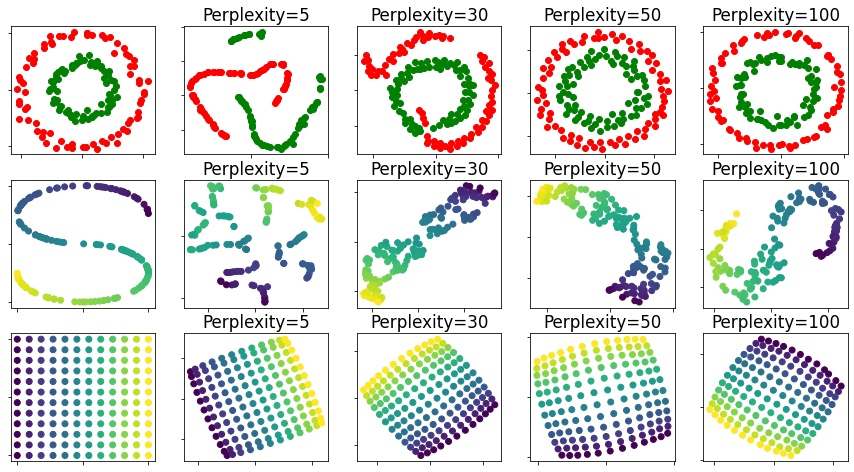

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
plt.show()

N= 1000   D= 3
1552.6302096770091
mean minimum distance between points:  18.55757910124019
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE wi

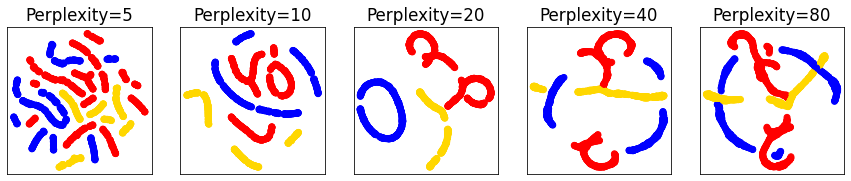

In [6]:
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarnin

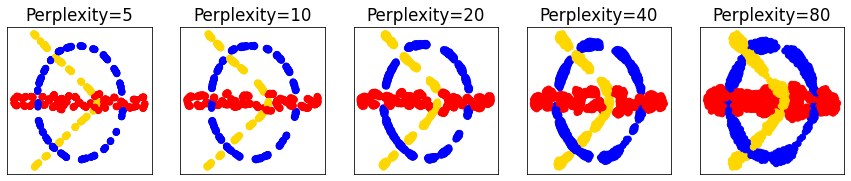

In [7]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

## ---------------------------------------------------
## Exercise 3: Correlation between eps and minPts
## ---------------------------------------------------

In [8]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


### Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

In [9]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)
r=mean_min_dist

1552.6302096770091
mean minimum distance between points:  18.55757910124019


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


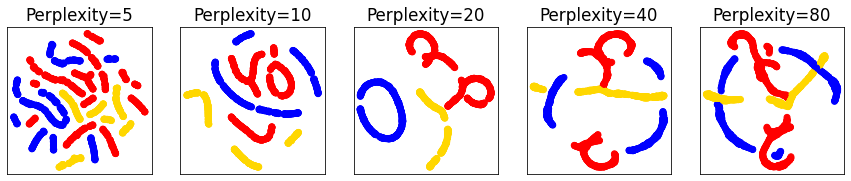

In [10]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])


min_sample_range =  np.linspace(1,10,40)
# min_sample_range =  np.arange(1,5)
eps_range =         np.linspace(80,160,40)


(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

### DBSCAN: find labels by applying clustering

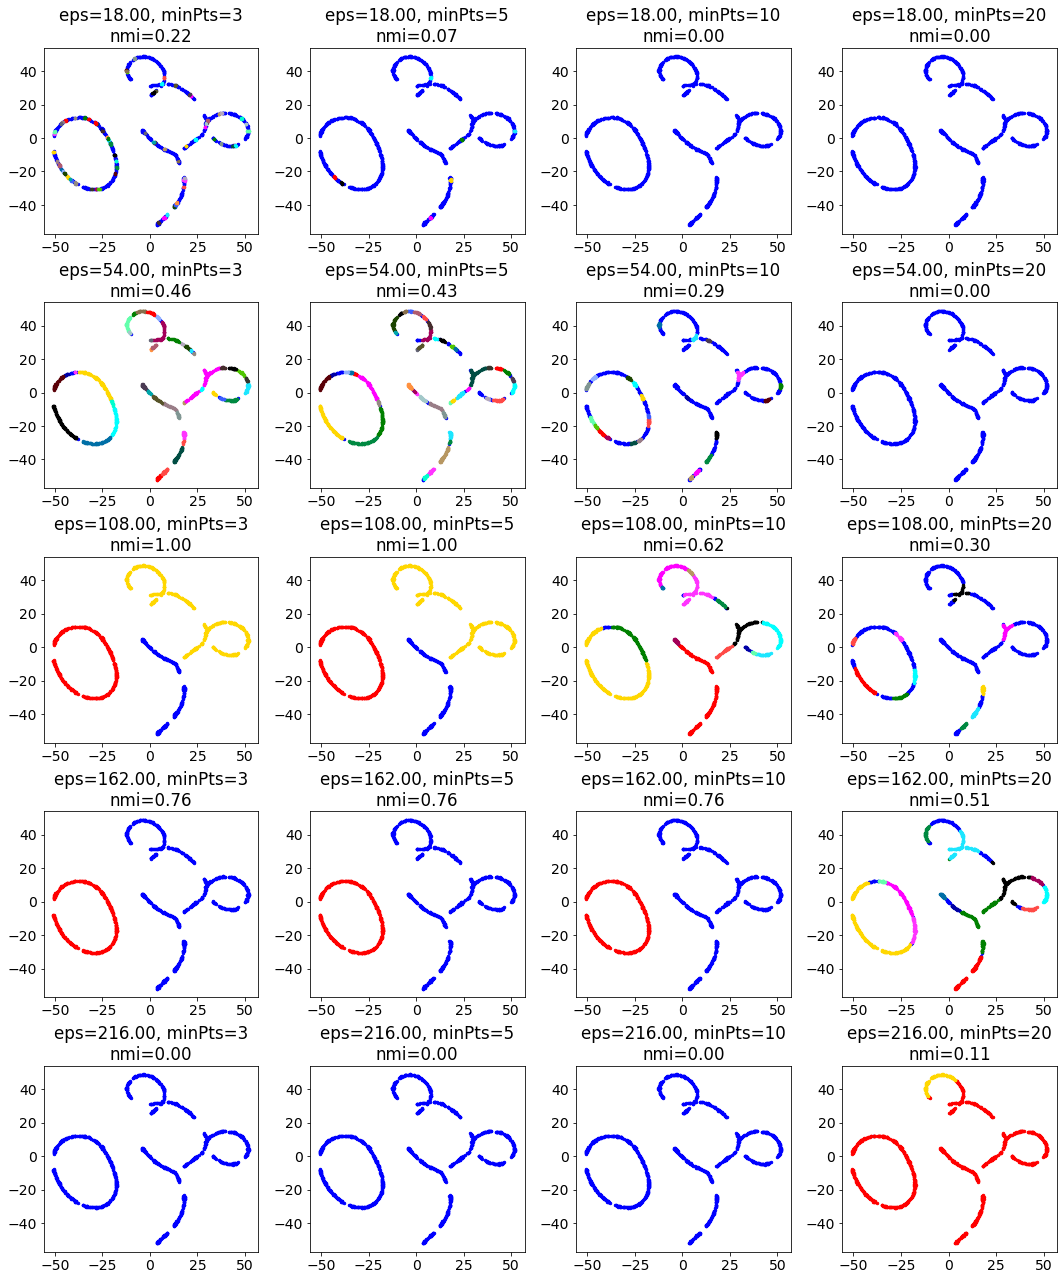

In [11]:
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[3] # best visualization above
X = data
y_true = y

#eps_range = [0.01,0.1,0.5,1.0,10.]
if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)
eps_range = [r,3*r,6*r,9*r,12*r]
min_sample_range = [3,5,10,20]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,18))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        plotting_ax(X2D,y_hat,ax[i,j])
        nmi=NMI(y_hat, y_true)
        ax[i,j].set_title('eps=%.2f, minPts=%i\nnmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()


### Ivestigating the Correlation between eps and minPts

In [12]:
min_sample_range =   np.linspace(1,12,40)
# min_sample_range = [3,5,10,20]

eps_range =          [r * i for i in np.linspace(1, 38, 40)]
# eps_range =        [r,3*r,6*r,9*r,12*r]

print("eps_range:", np.array(eps_range).shape)
print("min_sample_range:", np.array(min_sample_range).shape)

eps_range: (40,)
min_sample_range: (40,)


In [13]:
NMI_list=[]
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        # plotting_ax(X2D,y_hat,ax[i,j])
        nmi=NMI(y_hat, y_true)
        #Storing the NM
        NMI_list.append(nmi)
        # ax[i,j].set_title('eps=%.2f, minPts=%i\nnmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

df = pd.DataFrame({'NMI': NMI_list})
df.to_csv('./results_DATA/Ex_3_NMI.csv')

<Figure size 432x288 with 0 Axes>

In [14]:
#Measuring the correlation between eps and minPts in high NMI

#looking at high values of NMI

min_sample_range =  np.linspace(1,10,40)
# min_sample_range =  np.arange(1,5)
eps_range =         np.linspace(80,160,40)

print("eps_range:", np.array(eps_range).shape)
print("min_sample_range:", np.array(min_sample_range).shape)

eps_range: (40,)
min_sample_range: (40,)


Text(0.5, 0.92, 'NMI plotted as a function of eps and minSpt')

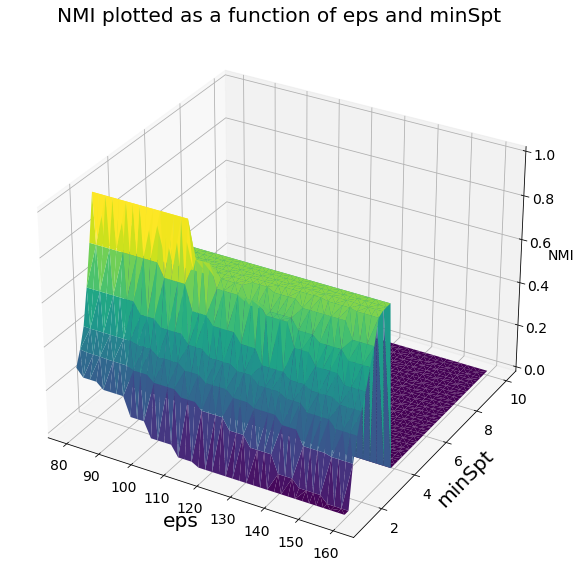

In [15]:
NMI_list = pd.read_csv('./results_DATA/Ex_3_NMI.csv')
NMI_list= list(NMI_list['NMI'])

x  =   eps_range 
y  =   min_sample_range 
X1,Y = np.meshgrid(x,y)
X1 =   np.ravel(X1)
Y  =   np.ravel(Y)
Z  =   NMI_list
fig, ax = plt.subplots( subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.plot_trisurf(X1,Y,Z,  cmap='viridis', edgecolor='none')
ax.set_xlabel('eps', fontsize='x-large')
ax.set_ylabel('minSpt', fontsize='x-large')
ax.set_zlabel('NMI')
ax.set_title("NMI plotted as a function of eps and minSpt",
              fontsize='x-large')

In [16]:
min_sample_range =  np.linspace(1,10,100)
# min_sample_range =  np.arange(1,5)
eps_range =         np.linspace(50,125,100)

In [17]:
eps_list=[]
minspt_list=[]
nmi_list=[]

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        nmi=NMI(y_hat, y_true)
        eps_list.append(eps)
        minspt_list.append(min_samples)
        nmi_list.append(nmi)
        
df = pd.DataFrame({'eps': eps_list,'minSpt': minspt_list,'NMI': nmi_list})
df.to_csv('./results_DATA/Ex_3_Corr.csv')

In [18]:
df =  pd.read_csv('./results_DATA/Ex_3_Corr.csv')
new_df = df[df['NMI']>0.5]   #Specifying What we Mean by High NMI

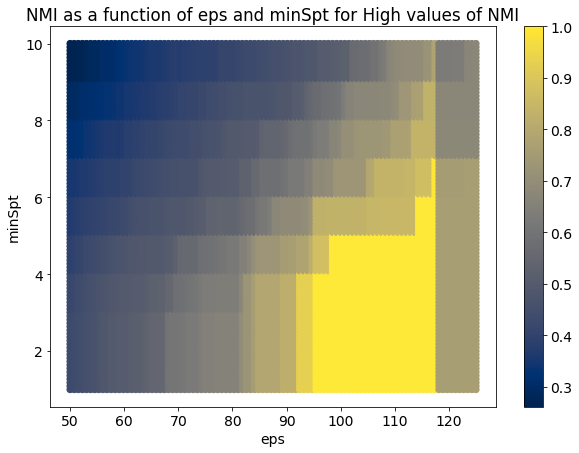

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(df.eps, df.minSpt, s=40, c=df.NMI, cmap='cividis')
plt.xlabel('eps')
plt.ylabel('minSpt')
plt.title('NMI as a function of eps and minSpt for High values of NMI')
plt.colorbar()

### Plotting of Ranked Disctances

Directly quoted from http://sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/:

"The method proposed here consists of computing the k-nearest neighbor distances in a matrix of points. The idea is to calculate, the average of the distances of every point to its k nearest neighbors. The value of k will be specified by the user and corresponds to MinPts. Next, these k-distances are plotted in ascending order. The aim is to determine the “knee”, which corresponds to the optimal eps parameter. A knee corresponds to a threshold where a sharp change occurs along the k-distance curve."

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


In [22]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

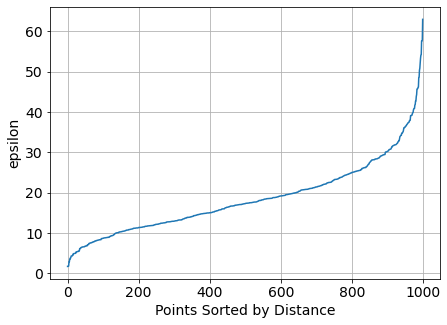

In [23]:
plt.figure(figsize=(7,5))
plt.plot(distances)
plt.ylabel("epsilon")
plt.xlabel("Points Sorted by Distance")
plt.grid()

"The ideal value for ε will be equal to the distance value at the “crook of the elbow”,or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur."
Ref: http://sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

Text(990, 32, 'optimal ε')

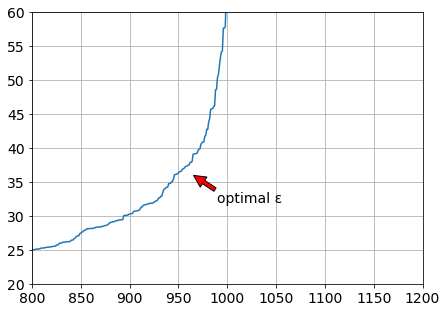

In [24]:
plt.figure(figsize=(7,5))
plt.plot(distances)
plt.xlim(800,1200)
plt.ylim(20,60)
plt.grid()
plt.annotate('optimal ε', xy=(965, 36), xytext=(990, 32),
             arrowprops=dict(facecolor='red', shrink=0.02),
             )

According to the refrenece, we loop on both minSpt and epsilon slightly above and below the optimal value to find the best nmi and the best epilon corresponding to it

In [25]:
eps_range        =  list(np.linspace(35,40,40))
min_sample_range =  list(np.linspace(1,10,40))
nmi_list=[]
minspt_list=[]
eps_list= []

for i, min_samples in enumerate(min_sample_range):
    for j , eps in enumerate(eps_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        nmi=NMI(y_hat, y_true)
        minspt_list.append(min_samples)
        eps_list.append(eps)
        nmi_list.append(nmi)

In [26]:
df = pd.DataFrame({'eps':eps_list , 'minSpt': minspt_list,'NMI': nmi_list})
df.to_csv('./results_DATA/Ex_3_Ranked_Dis.csv')

In [27]:
df = pd.read_csv('./results_DATA/Ex_3_Ranked_Dis.csv')
best_params = df[df['NMI'] == df['NMI'].max()]

print("Best Paramteres:\n")
print(best_params.iloc[:,1:4].reset_index(drop=True))

Best Paramteres:

    eps  minSpt       NMI
0  40.0     1.0  0.380043


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>